In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import timeit #time measure
import sklearn

import warnings

import sys

In [ ]:
train_df = pd.read_csv('/tutorial/train.csv')
test_df = pd.read_csv('/tutorial/test.csv')

In [ ]:
train = train_df.copy()
test = test_df.copy()

In [ ]:
print("train.csv.sahpe:", train.shape)
print("test.csv.shape:", test.shape)

train.csv.sahpe: (1216553, 13)
test.csv.shape: (5463, 12)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [ ]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


train.csv<br>
transaction_id : 아파트 거래에 대한 유니크한 아이디<br>
apartment_id : 아파트 아이디<br>
city : 도시<br>
dong : 동<br>
jibun : 지번<br>
apt : 아파트단지 이름<br>
addr_kr : 주소<br>
exclusive_use_area : 전용면적<br>
year_of_completion : 설립일자<br>
transaction_year_month : 거래년월<br>
transaction_date : 거래날짜<br>
floor : 층<br>
transaction_real_price : 실거래가<br>

In [ ]:
# 결측값 확인
# train data set의 실거래가 열은 버리고, 결측값의 갯수를 셈
train_null = train.drop('transaction_real_price', axis=1).isnull().sum()/len(train)*100
test_null = test.isnull().sum()/len(test)*100
pd.DataFrame({'train_null_count':train_null,'test_null_count':test_null})

,train_null_count,test_null_count
transaction_id,0.0,0.0
apartment_id,0.0,0.0
city,0.0,0.0
dong,0.0,0.0
jibun,0.0,0.0
apt,0.0,0.0
addr_kr,0.0,0.0
exclusive_use_area,0.0,0.0
year_of_completion,0.0,0.0
transaction_year_month,0.0,0.0


In [ ]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


# EDA and processing

## target variable


transaction_real_price

In [ ]:
train['transaction_real_price'].describe()

count    1.216553e+06
mean     3.822769e+04
std      3.104898e+04
min      1.000000e+02
25%      1.900000e+04
50%      3.090000e+04
75%      4.700000e+04
max      8.200000e+05
Name: transaction_real_price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


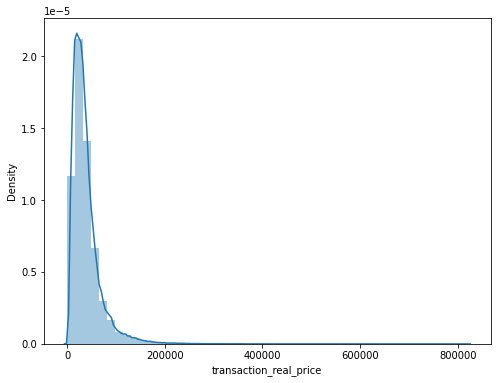

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.distplot(train['transaction_real_price'])

### 정규성 확인 

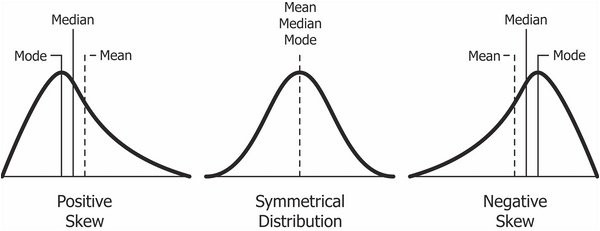


skewness가 -0.5 ~ 0,5 일 경우 데이터가 대칭 <br>
skewness가 (-1, -0.5) 이거나 (0.5,1) 일 경우 데이터는 적당히 치우쳐있다.<br>
skewness가 -1보다 작거나 1보다 클 경우 데이터는 상당히 치우쳐있다.<br>




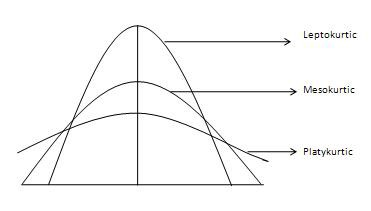
<br>
kurtosis<br>

분포에 존재하는 특이치(outlier)의 척도다.<br>

 

Kurtosis가 높으면 데이터가 두꺼운 꼬리나 outlier를 가지고 있다는 것을 의미하는 지표이다. 왜 이렇게 많은 outlier를 가지고 있는지 조사할 필요가 있다. 어쩌면 잘못된 데이터 입력이나 다른 것들이 있을 수 있다. 조사해보자!<br>

 

Kurtosis가 낮으면 데이터가 얇은 꼬리나 outlier를 가지고 있지 않다는 듯이다. 만약 낮은 첨도가 나온다고 해도 이상 결과의 데이터를 다듬을 필요가 있다.<br>

In [ ]:
print("Skewness: %f, Kurtosis: %f", (train['transaction_real_price'].skew(), train['transaction_real_price'].kurt()))

Skewness: %f, Kurtosis: %f (3.4071692420405535, 24.839820787251245)


데이터는 현재, positive skewness로 왼쪽으로 상당히 치우쳐 있음.<br>
데이터는 현재, kurtosis의 값이 매우 높으므로 데이터의 두꺼운 꼬리나 outlier를 가지고 있음.

### 정규변환

일변량 분석의 기초는 평균에 대한 추론이다.<br>
평균은 치우침이나 이상치에 영향을 많이 받으므로 평균,평균 차이 방법론을 적용하기 전에 치우침과 이상치 진단을 해야함.<br>
치우침(왜도) 정규성 검정, 이상치 진단은 상자-수염 그림에 의함<br>
선형모형에서 확률변수들에 의한 치우침이나 이상치 (회귀모형에서는 스튜던트 잔차) 진단을 실시함

1. 정규성 진단 <br>
Q-Q plot 사용, 히스토그램, 통계량 ( 수리적 왜도, EDA 왜도 ), 적합성 검정 (H0: 데이터는 정규분포를 따른다. H1: 데이터는 정규분포를 따르지 않는다 ),  Shapiro Wilk W-통계량, Kolmogorov D-통계량, Anderson-Darling AD 통계량

2. 정규변환 <br> 
제곱근 변환, 로그변환


In [ ]:

# np.log1p() 를 통해 로그변환함.

train['transaction_real_price']= np.log1p(train['transaction_real_price'])
print("Skewness: %f, Kurtosis: %f", (train['transaction_real_price'].skew(), train['transaction_real_price'].kurt()))

Skewness: %f, Kurtosis: %f (-0.09493151731286435, 0.24886558181939034)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


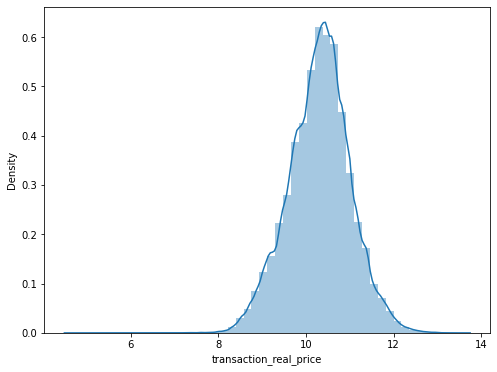

In [ ]:


f, ax = plt.subplots(figsize=(8,6))
sns.distplot(train['transaction_real_price'])

## columns 상관관계

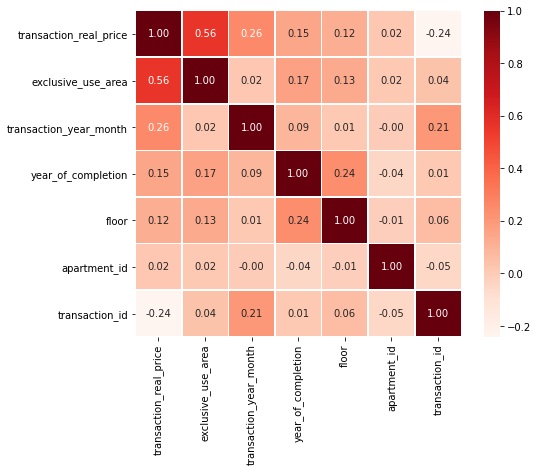

In [ ]:
# k : 히트맵 변수갯수
k = train.shape[1]
corrmat = train.corr()
cols= corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data = cm, annot=True, square=True, fmt='.2f',linewidths=.5, cmap='Reds', yticklabels=cols.values, xticklabels=cols.values)

면적과 실거래가에 양의 상관관계가 있음을 알 수 있다 


# Numerical Variable



## apartment_id & transaction_id

In [ ]:
len(train['apartment_id'].unique())

12533

In [ ]:

len(train['transaction_id'].unique())

1216553

In [ ]:
# train_id = train['transaction_id']
# train = train.drop('transaction_id',axis=1)
# test_id = test['transaction_id']
# test = test.drop('transaction_id', axis=1)

## floor

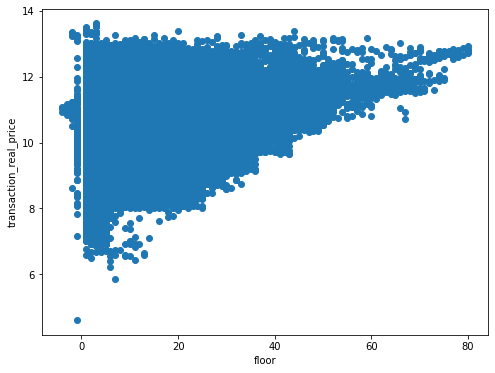

In [ ]:

f, ax = plt.subplots(figsize=(8,6))
plt.scatter(train['floor'],train['transaction_real_price'])
plt.xlabel('floor')
plt.ylabel('transaction_real_price')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f, Kurtosis: %f (1.3247097550477565, 3.7966033670123065)


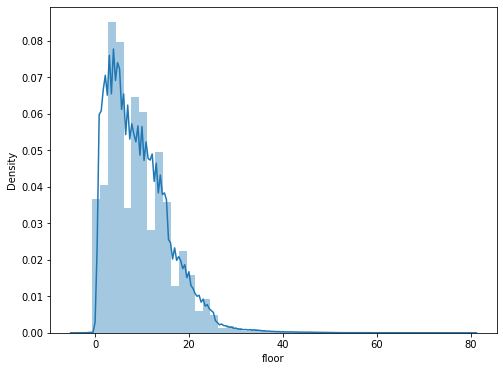

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.distplot(train['floor'])
print("Skewness: %f, Kurtosis: %f", (train['floor'].skew(), train['floor'].kurt()))

numerical variable 은 다른데이터와 비교를 해야하므로 왜도와 첨도 조정은 나중에 함.

## exclusive_use_area 전용
 면적

In [ ]:
train['exclusive_use_area'].describe()

count    1.216553e+06
mean     7.816549e+01
std      2.915113e+01
min      9.260000e+00
25%      5.976000e+01
50%      8.241000e+01
75%      8.497000e+01
max      4.243200e+02
Name: exclusive_use_area, dtype: float64

평균 : 78.16549 <br>
표준편차 : 29.15113 <br>
min : 9.26 <br> 
max : 424.32 <br>

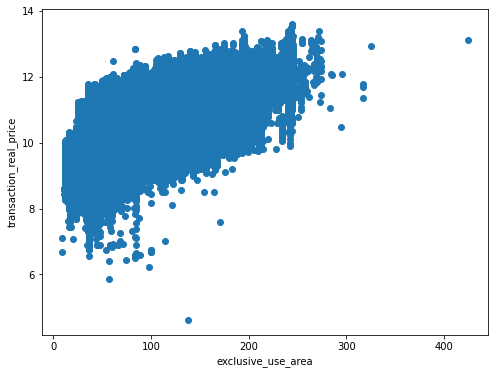

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
plt.scatter(train['exclusive_use_area'], train['transaction_real_price'])
plt.xlabel('exclusive_use_area')
plt.ylabel('transaction_real_price')
plt.show()

이상치 탐지

In [ ]:
train[train['exclusive_use_area']>400]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
563870,563870,12633,서울특별시,도곡동,193-1,힐데스하임빌라,도곡동 193-1 힐데스하임빌라,424.32,1998,201604,11~20,10,13.118357


In [ ]:



train[(train['exclusive_use_area']<150)& (train['transaction_real_price']<6)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
312119,312119,10853,서울특별시,신월동,128,태헌(신월프라자),신월동 128 태헌(신월프라자),56.97,1999,201005,21~31,7,5.860786
722888,722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f, Kurtosis: %f (1.2275090586886344, 3.1005174479571935)


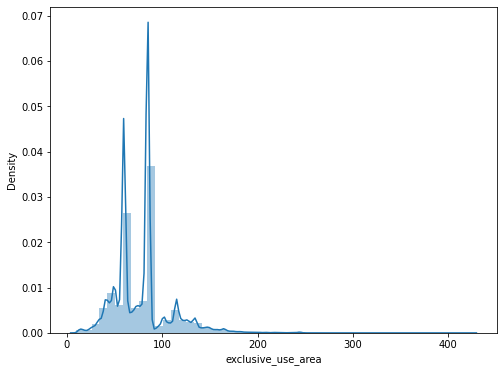

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['exclusive_use_area'])
print("Skewness: %f, Kurtosis: %f", (train['exclusive_use_area'].skew(), train['exclusive_use_area'].kurt()))

## transaction_year_month


In [ ]:
train_test_data = [train, test]

for dataset in train_test_data:
  dataset['transaction_year_month']= dataset['transaction_year_month'].astype(str)
  dataset['year']=dataset['transaction_year_month'].str[:4].astype(int)
  dataset['month']=dataset['transaction_year_month'].str[4:6].astype(int)
  dataset['transaction_year_month']=dataset['transaction_year_month'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


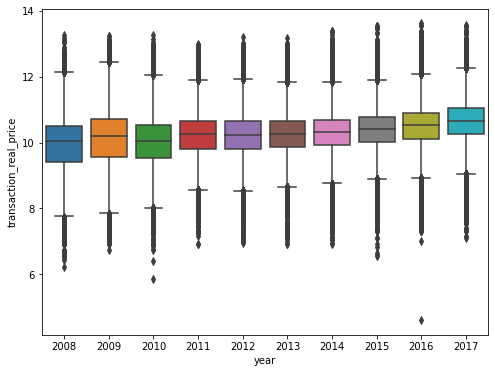

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(train['year'], train['transaction_real_price'])
plt.show()

In [ ]:

train[(train['year']==2016)&(train['transaction_real_price']<6)]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.25,1974,201606,21~30,-1,4.615121,2016,6


In [ ]:
train[train['apt']=='서면']

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
695725,695725,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201105,21~31,3,8.682877,2011,5
696834,696834,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201108,21~31,1,8.922792,2011,8
700884,700884,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,88.93,1974,201206,1~10,1,10.126671,2012,6
702589,702589,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201212,21~31,5,8.699681,2012,12
702876,702876,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201301,11~20,4,8.909370,2013,1
703979,703979,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201304,1~10,1,8.853808,2013,4
711024,711024,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201407,21~31,5,8.853808,2014,7
712441,712441,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201410,21~31,3,9.082621,2014,10
713864,713864,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201501,1~10,4,8.955577,2015,1
721684,721684,6238,부산광역시,전포동,산99-46,서면,전포동 산99-46 서면,57.59,1976,201604,1~10,1,9.059634,2016,4


In [ ]:
train[train['floor']==-1].sort_values('transaction_real_price')

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
722888,722888,6225,부산광역시,범전동,263-5,서면,범전동 263-5 서면,138.250,1974,201606,21~30,-1,4.615121,2016,6
651052,651052,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,200809,21~30,-1,7.170888,2008,9
651087,651087,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.890,1996,200810,11~20,-1,7.824446,2008,10
651641,651641,1514,부산광역시,대청동4가,75-176,근영빌라2동,대청동4가 75-176 근영빌라2동,47.170,1996,201101,21~31,-1,8.071219,2011,1
674249,674249,9764,부산광역시,동삼동,213-19,조은아크로빌,동삼동 213-19 조은아크로빌,46.800,2001,201506,11~20,-1,8.160804,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537384,537384,10310,서울특별시,청담동,102-13,청담파라곤Ⅱ 2단지,청담동 102-13 청담파라곤Ⅱ 2단지,241.880,2010,201012,11~20,-1,12.577640,2010,12
1095417,1095753,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,13.081543,2017,5
1095416,1095752,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,13.102163,2017,5
23585,23585,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,240.230,2011,201612,1~10,-1,13.204866,2016,12


In [ ]:
train[train['apt']=='근영빌라1동'].sort_values('floor')

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month
651087,651087,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.89,1996,200810,11~20,-1,7.824446,2008,10
651599,651599,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,54.73,1996,201011,1~10,1,8.216358,2010,11
652009,652009,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,51.83,1996,201210,21~31,5,8.824825,2012,10
652591,652591,1513,부산광역시,대청동4가,75-181,근영빌라1동,대청동4가 75-181 근영빌라1동,59.89,1996,201508,1~10,5,9.169623,2015,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


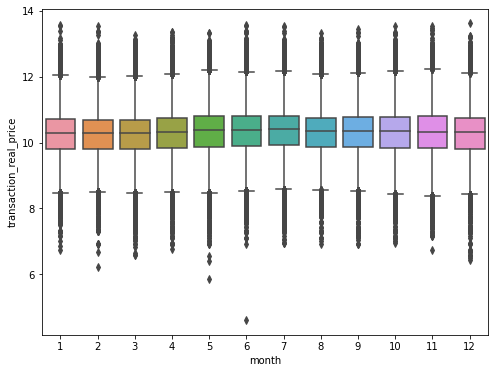

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(train['month'], train['transaction_real_price'])
plt.show()

## year_of_completion

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


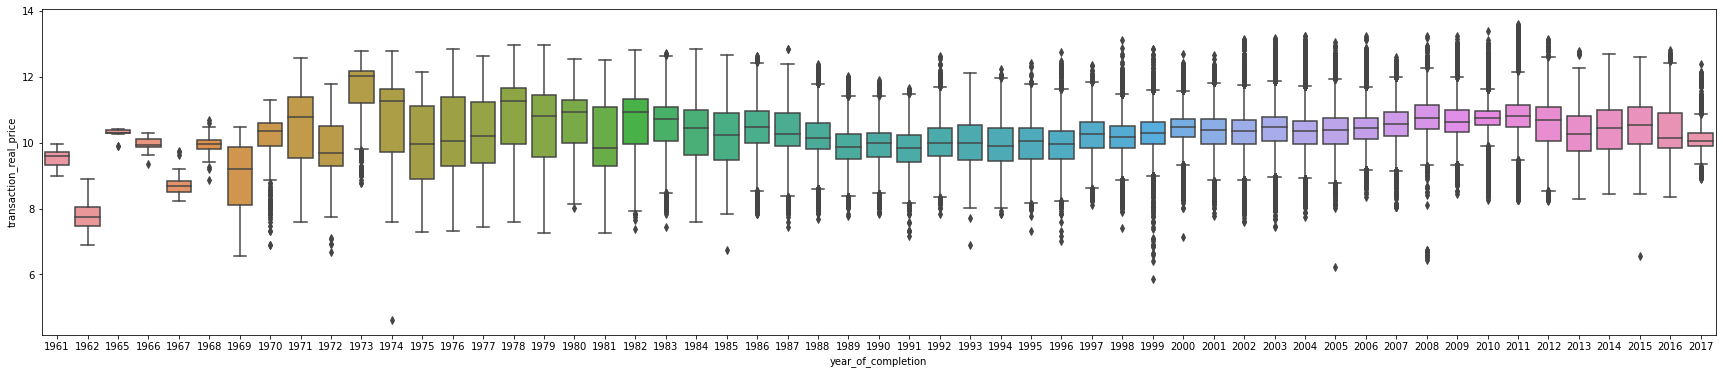

In [ ]:
f, ax = plt.subplots(figsize=(30,6))
sns.boxplot(train['year_of_completion'], train['transaction_real_price'])
plt.show()

# Catergorical Variable



## City


In [ ]:
replace_name ={'서울특별시':0, '부산광역시':1}
train = train.replace({'City':replace_name})
test = test.replace({'City':replace_name})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


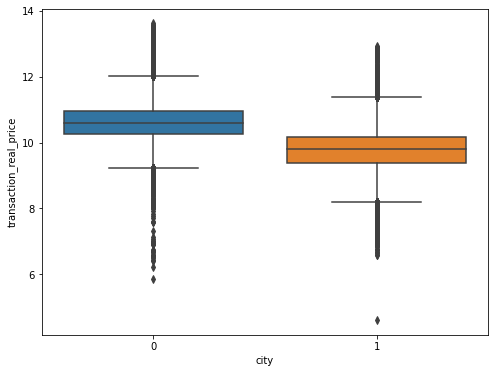

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(train['city'], train['transaction_real_price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


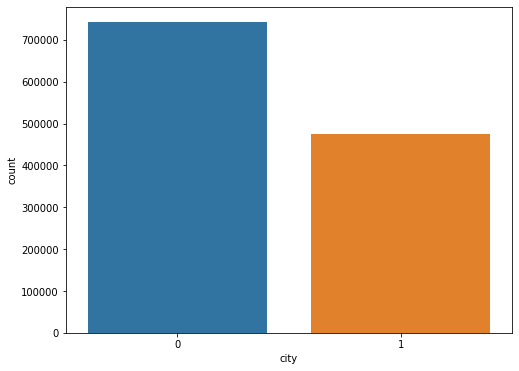

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.countplot(train['city'])
plt.show()

## addr_kr 동,지번,아파트 단지 이름 합친것 필요없으니 삭제

In [ ]:
train = train.drop('addr_kr', axis=1)
test = test.drop('addr_kr', axis=1)

## 한강 feature 만들기

In [ ]:
train['hangang']=train['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)
test['hangang']=test['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)

In [ ]:
len(train['dong'].unique())

473

In [ ]:
train_dong = train[['transaction_real_price','dong']].groupby('dong').mean().sort_values('transaction_real_price').reset_index()
train_dong

,dong,transaction_real_price
0,신선동3가,8.543619
1,봉래동5가,8.590871
2,장안읍 명례리,8.597728
3,신창동2가,8.601466
4,신선동2가,8.622581
...,...,...
468,회현동2가,11.833004
469,용산동5가,11.907140
470,압구정동,11.946198
471,청암동,11.972690


In [ ]:
dong_num = {}
for i in range(len(train_dong)):
  dong = train_dong['dong'].iloc[i]
  dong_num[dong]=i

dong_num

{'가락동': 391,
 '가리봉동': 159,
 '가산동': 167,
 '가야동': 94,
 '가양동': 210,
 '갈월동': 362,
 '갈현동': 169,
 '감만동': 29,
 '감전동': 47,
 '감천동': 46,
 '강일동': 311,
 '개금동': 70,
 '개봉동': 242,
 '개포동': 432,
 '거여동': 281,
 '거제동': 162,
 '견지동': 453,
 '고덕동': 388,
 '고척동': 222,
 '공덕동': 401,
 '공릉동': 192,
 '공항동': 279,
 '광안동': 84,
 '광장동': 415,
 '괘법동': 115,
 '괴정동': 66,
 '교남동': 465,
 '교북동': 280,
 '구기동': 327,
 '구로동': 194,
 '구산동': 191,
 '구서동': 144,
 '구수동': 321,
 '구의동': 387,
 '구평동': 35,
 '구포동': 65,
 '군자동': 316,
 '궁동': 204,
 '금곡동': 37,
 '금사동': 49,
 '금호동1가': 332,
 '금호동2가': 426,
 '금호동3가': 355,
 '금호동4가': 404,
 '기장읍 교리': 58,
 '기장읍 내리': 160,
 '기장읍 대라리': 42,
 '기장읍 대변리': 13,
 '기장읍 동부리': 50,
 '기장읍 서부리': 17,
 '기장읍 청강리': 41,
 '길동': 243,
 '길음동': 319,
 '낙민동': 136,
 '낙원동': 174,
 '남가좌동': 324,
 '남대문로5가': 466,
 '남부민동': 82,
 '남산동': 71,
 '남산동2가': 250,
 '남창동': 110,
 '남천동': 215,
 '남항동1가': 131,
 '남항동2가': 122,
 '남항동3가': 15,
 '남현동': 317,
 '내곡동': 443,
 '내발산동': 304,
 '내수동': 462,
 '냉천동': 383,
 '노고산동': 129,
 '노량진동': 312,
 '녹번동': 251,
 '녹산동': 128,
 '논현동': 4

In [ ]:
train = train.replace({'dong' : dong_num})
test = test.replace({'dong' : dong_num})
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang
0,0,7622,서울특별시,351,6-13,신현(101동),84.82,2002,200801,21~31,2,10.532123,2008,1,0
1,1,5399,서울특별시,414,142,사직파크맨션,99.17,1973,200801,1~10,6,9.903538,2008,1,0
2,2,3578,서울특별시,414,174-1,두레엘리시안,84.74,2007,200801,1~10,6,10.558439,2008,1,0
3,3,10957,서울특별시,462,95,파크팰리스,146.39,2003,200801,11~20,15,11.678448,2008,1,0
4,4,10639,서울특별시,462,110-15,킹스매너,194.43,2004,200801,21~31,3,11.695255,2008,1,0


## Jibun

In [ ]:
len(train['jibun'].unique())

8961

In [ ]:
train_jibun = train[['transaction_real_price','jibun']].groupby('jibun').mean().sort_values('transaction_real_price').reset_index()
train_jibun.head()

,jibun,transaction_real_price
0,산3-148,7.225286
1,737-1,7.494417
2,741-1,7.498174
3,1181-4,7.585491
4,11-174,7.601402


## apt

In [ ]:
len(train['apt'].unique())

10440

In [ ]:
train_apt = train[['transaction_real_price','apt']].groupby('apt').mean().sort_values('transaction_real_price').reset_index()
train_apt.head()

,apt,transaction_real_price
0,좌천시민(737-1),7.494417
1,좌천시민(741-1),7.498174
2,수정(1181-4),7.585491
3,수정(1175-1),7.626830
4,수정(1186-1),7.685623


지번과 아파트 데이터는 unique() 가 많으므로 따로 labelling 하지 않는다. 

## transaction_date는 거래기간으로 day_diff라는 새로운 컬럼으로 생성

In [ ]:
train['day_diff'] = train['transaction_date'].str.rsplit('~',expand=True)[1].astype(int)-train['transaction_date'].str.rsplit('~',expand=True)[0].astype(int)
test['day_diff'] = test['transaction_date'].str.rsplit('~',expand=True)[1].astype(int)-test['transaction_date'].str.rsplit('~',expand=True)[0].astype(int)

In [ ]:
len(train['transaction_date'].unique())

6

transaction_date 데이터 unique 갯수가 몇개 안되므로 라벨링

In [ ]:
train_date = train[['transaction_real_price','transaction_date']].groupby('transaction_date').mean().sort_values('transaction_real_price').reset_index()
train_date.head()


,transaction_date,transaction_real_price
0,21~29,10.176453
1,21~28,10.286294
2,1~10,10.293390
3,11~20,10.306731
4,21~31,10.318796


In [ ]:
date_num={}
for i in range(len(train_date)):
  date = train_date['transaction_date'].iloc[i]
  date_num[date]=i

date_num

{'11~20': 3, '1~10': 2, '21~28': 1, '21~29': 0, '21~30': 5, '21~31': 4}

In [ ]:
train = train.replace({'transaction_date' : date_num})
test = test.replace({'transaction_date' : date_num})
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang,day_diff
0,0,7622,서울특별시,351,6-13,신현(101동),84.82,2002,200801,4,2,10.532123,2008,1,0,10
1,1,5399,서울특별시,414,142,사직파크맨션,99.17,1973,200801,2,6,9.903538,2008,1,0,9
2,2,3578,서울특별시,414,174-1,두레엘리시안,84.74,2007,200801,2,6,10.558439,2008,1,0,9
3,3,10957,서울특별시,462,95,파크팰리스,146.39,2003,200801,3,15,11.678448,2008,1,0,9
4,4,10639,서울특별시,462,110-15,킹스매너,194.43,2004,200801,4,3,11.695255,2008,1,0,10


#Preprocessing

floor 같은 경우 -값이 존재하기 때문에 log를 취하기 전에 각 값에 +5를 하면서 모든 값을 양수로 만들어줍니다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f, Kurtosis: %f (0.08963630402012733, -0.6408851871034487)


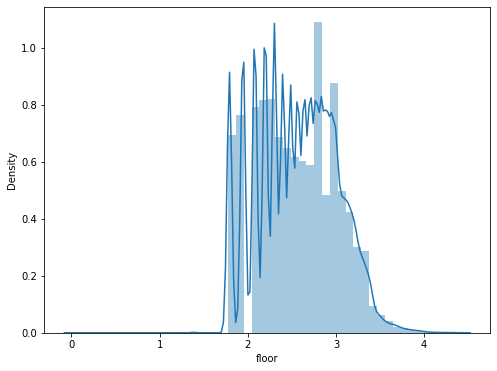

In [ ]:
train['floor'] = np.log(train['floor']+5)
test['floor'] = np.log(test['floor']+5)
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(train['floor'])
print("Skewness: %f, Kurtosis: %f", (train['floor'].skew(), train['floor'].kurt()))

In [ ]:
drop_columns = ['apt', 'jibun', 'transaction_year_month']

train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [ ]:
train.head()

,transaction_id,apartment_id,city,dong,exclusive_use_area,year_of_completion,transaction_date,floor,transaction_real_price,year,month,hangang,day_diff
0,0,7622,서울특별시,351,84.82,2002,4,1.945910,10.532123,2008,1,0,10
1,1,5399,서울특별시,414,99.17,1973,2,2.397895,9.903538,2008,1,0,9
2,2,3578,서울특별시,414,84.74,2007,2,2.397895,10.558439,2008,1,0,9
3,3,10957,서울특별시,462,146.39,2003,3,2.995732,11.678448,2008,1,0,9
4,4,10639,서울특별시,462,194.43,2004,4,2.079442,11.695255,2008,1,0,10


#Feature Engineering

아파트 나이와, 재건축 유무 column 생성

In [ ]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['age'] = dataset['year'] - dataset['year_of_completion']
    dataset['is_rebuild']=(dataset['age']>=30).astype(int)

In [ ]:
train_columns = []
for column in train.columns[:]:
    if train[column].skew() >= 1:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), train[column].kurt()))
        train_columns.append(column)
    elif train[column].kurt() >= 3:
        print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), train[column].kurt()))
        train_columns.append(column)

exclusive_use_area -> Skewness: 1.227509, Kurtosis: 3.100517
hangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -0.589751, Kurtosis: 4.573129
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


In [ ]:
for column in train_columns :
    train[column] = np.log1p(train[column])
    test[column] = np.log1p(test[column])
    print("%s -> Skewness: %f, Kurtosis: %f" %  (column,train[column].skew(), train[column].kurt()))

exclusive_use_area -> Skewness: -0.438156, Kurtosis: 1.744119
hangang -> Skewness: 6.358349, Kurtosis: 38.428662
day_diff -> Skewness: -1.128137, Kurtosis: 6.788569
is_rebuild -> Skewness: 3.324832, Kurtosis: 9.054522


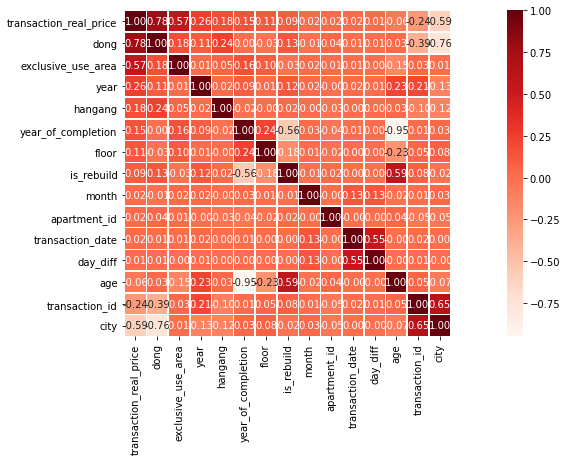

In [ ]:
k=train.shape[1] #히트맵 변수 갯수
corrmat = train.corr() 
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index 
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', yticklabels = cols.values, xticklabels = cols.values)

# Modeling

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
target = train['transaction_real_price']
del train['transaction_real_price']

In [ ]:
n_folds = 2

def cv_score(models):
    kfold = KFold(n_splits=n_folds, shuffle=True ,random_state=42).get_n_splits(train.values)
    for m in models:
        cvs = np.mean(cross_val_score(m['model'], train.values, target, cv=kfold))
        rmse = np.mean(np.sqrt(-cross_val_score(m['model'], train.values, np.expm1(target), scoring = "neg_mean_squared_error", cv = kfold)))
        print("Model {} CV score : {:.4f}".format(m['name'], cvs))
        print("RMSE : {:.4f}".format(rmse))

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=42))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))
gboost = GradientBoostingRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state=42)
xgboost = xgb.XGBRegressor(random_state=42)
lightgbm = lgb.LGBMRegressor(random_state=42, num_leaves = 100, min_data_in_leaf = 15, max_depth=6,
                            learning_rate = 0.1, min_child_samples = 30, feature_fraction=0.9, bagging_freq= 1,
                            bagging_fraction = 0.9, bagging_seed = 11, lambda_l1 = 0.1, verbosity = -1 )

models = [{'model': gboost, 'name':'GradientBoosting'}, 
          {'model': xgboost, 'name':'XGBoost'},
          {'model': lightgbm, 'name':'LightGBM'}, 
          {'model' : lasso, 'name' : 'LASSO Regression'}, 
          {'model' : ENet, 'name' : 'Elastic Net Regression'}, 
          {'model' : forest, 'name' : 'RandomForset'}]

In [ ]:
start = timeit.default_timer()
cv_score(models)
stop = timeit.default_timer()
print('불러오는데 걸린 시간 : {}초'.format(stop - start))

Model GradientBoosting CV score : 0.5817
RMSE : 15799.0451
[08:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:28:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBoost CV score : 0.5947
RMSE : 15868.0485
Model LightGBM CV score : 0.6131
RMSE : 14330.6681


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2603139171564.703, tolerance: 40952955908.86993
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4792351208476.406, tolerance: 66108280026.483154
  positive)


Model LASSO Regression CV score : 0.6842
RMSE : 19852.5360


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63250991868534.33, tolerance: 40952955908.86993
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119067374000148.31, tolerance: 66108280026.483154
  positive)


Model Elastic Net Regression CV score : 0.6841
RMSE : 19848.9725
Model RandomForset CV score : 0.5636
RMSE : 15188.2729
불러오는데 걸린 시간 : 1990.8073172250006초


In [ ]:
models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'},
         {'model':forest, 'name' : 'RandomForest'}]

def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([m['model'].predict(sub_x.values) for m in models])
    return predictions

In [ ]:
start = timeit.default_timer()

y_test_pred = AveragingBlending(models, train, target, test)
y_test_pred = (y_test_pred[:, 0]*0.05 + y_test_pred[:, 1]*0.1 + y_test_pred[:, 2]*0.85)
predictions = y_test_pred

stop = timeit.default_timer()
print('불러오는데 걸린 시간 : {}초'.format(stop - start))

[09:15:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
불러오는데 걸린 시간 : 822.3969534390017초


In [ ]:
sub = pd.read_csv('/tutorial/submission.csv')

In [ ]:
sub['transaction_real_price']=np.expm1(predictions)

In [ ]:
sub.to_csv('/tutorial/submission.csv', index=False)